In [55]:
import os
from pathlib import Path
from pps import PPS
import matplotlib.pyplot as plt

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example usage of PPS functionality

Import DukeScan file

In [57]:
filename = Path("data\example_stack_DS_CH1.tif")
stack = PPS(filename, dataType="DukeScan")

## Visualization
Show plot of average TA curve and projected stack

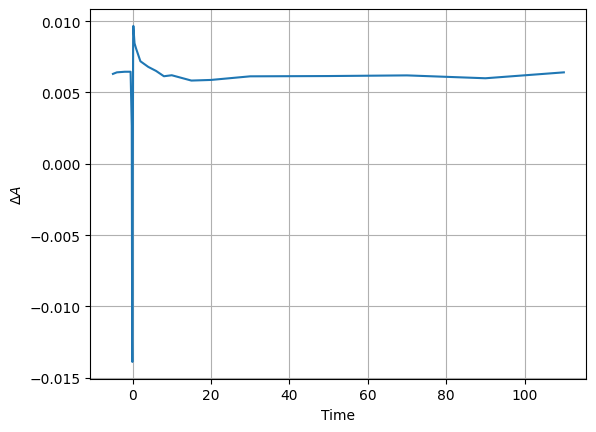

<Axes: xlabel='Time', ylabel='$\\Delta A$'>

In [58]:
stack.avg_show()

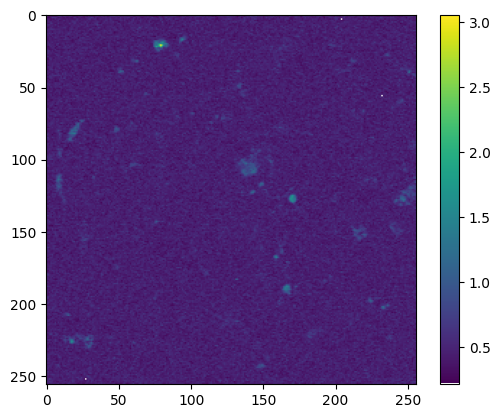

<Axes: >

In [59]:
stack.project_show()

## Processing

### Subtracting the mean of the first few images and downsampling

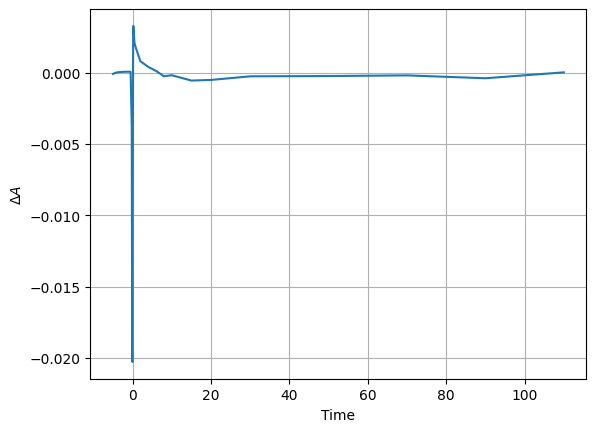

<Axes: xlabel='Time', ylabel='$\\Delta A$'>

In [60]:
stack.subtractFirst(n=3).avg_show()

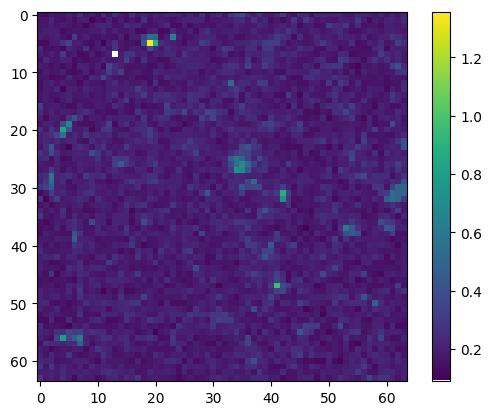

<Axes: >

In [61]:
stack.subtractFirst(n=3).downsample(4).project_show()

### intensity threshold

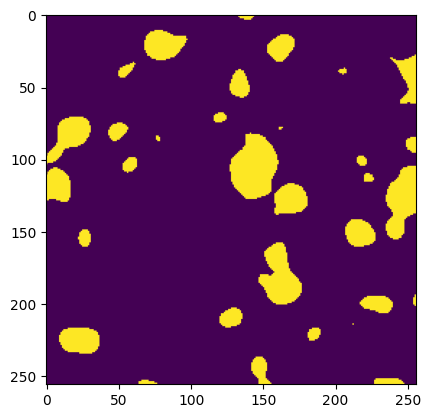

In [62]:
mask = stack.intensity_threshold()
plt.imshow(mask)
plt.show()

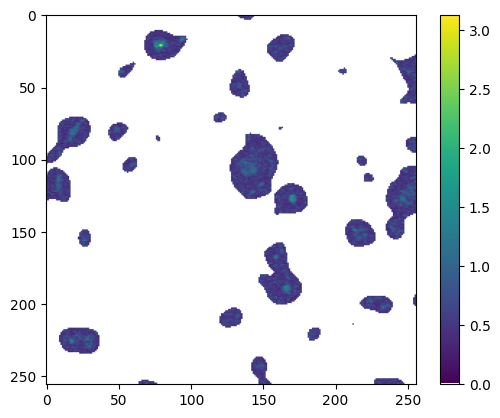

<Axes: >

In [63]:
stack.intensity_threshold(inplace=True)
stack.project_show()

### derive substacks

In [64]:
substacks = stack.substacks(128)
print(f"Number of substacks: {len(substacks)}")

Number of substacks: 4


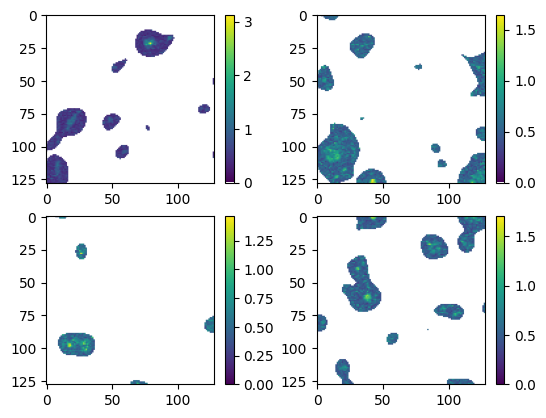

In [65]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
for i, substack in enumerate(substacks):
    substack.project_show(ax=axes[i])

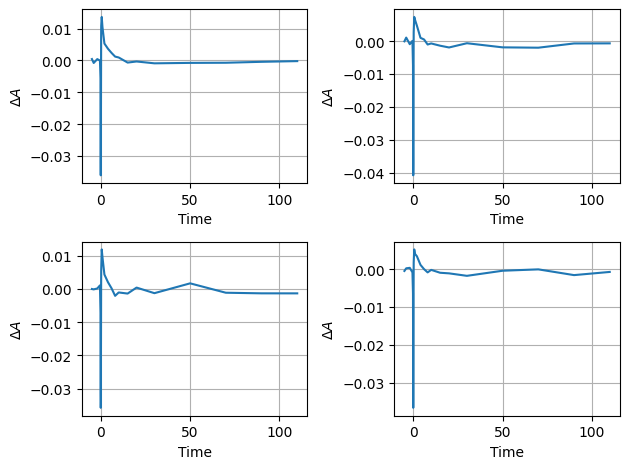

In [66]:
fig, ax = plt.subplots(2, 2)
ax = ax.flatten()
for i, substack in enumerate(substacks):
    substack.avg_show(ax=ax[i])

plt.tight_layout()

### Phasor

In [67]:
phasor = stack.phasor()

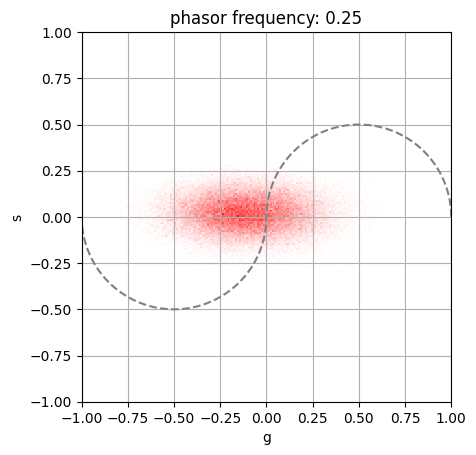

<Axes: title={'center': 'phasor frequency: 0.25'}, xlabel='g', ylabel='s'>

In [68]:
stack.phasor_show()